In [1]:
import keras
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D, Layer, Add
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from tensorflow.keras import optimizers
from skimage.transform import rotate
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
import cv2
import plotly.graph_objects as go
import os
import mlflow
import mlflow.tensorflow
from plotly.subplots import make_subplots
%matplotlib inline

In [2]:
df  = pd.read_csv('../cleaneddataset2.csv')

In [3]:
mlflow.tensorflow.autolog()

In [4]:
!mlflow ui


Traceback (most recent call last):
  File "C:\Users\gawai\anaconda3\envs\bunny\Scripts\waitress-serve-script.py", line 9, in <module>
    sys.exit(run())
  File "C:\Users\gawai\AppData\Roaming\Python\Python310\site-packages\waitress\runner.py", line 298, in run
    _serve(app, **kw)
  File "C:\Users\gawai\AppData\Roaming\Python\Python310\site-packages\waitress\__init__.py", line 13, in serve
    server = _server(app, **kw)
  File "C:\Users\gawai\AppData\Roaming\Python\Python310\site-packages\waitress\server.py", line 78, in create_server
    last_serv = TcpWSGIServer(
  File "C:\Users\gawai\AppData\Roaming\Python\Python310\site-packages\waitress\server.py", line 244, in __init__
    self.bind_server_socket()
  File "C:\Users\gawai\AppData\Roaming\Python\Python310\site-packages\waitress\server.py", line 361, in bind_server_socket
    self.bind(sockaddr)
  File "C:\Users\gawai\AppData\Roaming\Python\Python310\site-packages\waitress\wasyncore.py", line 396, in bind
    return self.socket.

In [4]:
df

SiteName  Depth(m) Diver  ImageNumber  ImageAnalyzedNumber  \
0     Nowlans Shoal         6    AB            8                  1.0   
1     Nowlans Shoal         6    AB           11                  2.0   
2     Nowlans Shoal         6    AB           14                  3.0   
3     Nowlans Shoal         6    AB           17                  4.0   
4     Nowlans Shoal         6    AB           20                  5.0   
...             ...       ...   ...          ...                  ...   
1064        Goose I         9    KA           27                  NaN   
1065        Goose I         9    KA           35                  NaN   
1066        Goose I         9    KA           41                  NaN   
1067        Goose I         9    KA           47                  NaN   
1068        Goose I         9    KA           53                  NaN   

      PhotoAnalyzed(0,1)  ReasonOmitted  ImageWidth(cm)  ImageLength(cm)  \
0                      1            NaN          178.84           100.53   
1                      1            NaN          179.00           100.62   
2                      1            NaN          172.65            97.05   
3                      1            NaN          166.20            93.42   
4                      1            NaN          184.24           103.57   
...                  ...            ...             ...              ...   
1064                   1            NaN          196.23           110.31   
1065                   1            NaN          180.55           101.49   
1066                   1            NaN          193.99           109.05   
1067                   1            NaN          196.61           110.52   
1068                   1            NaN          189.38           106.45   

      AreaPerPoint(cm^2)  ... MixedChondrusTurfCorallina  \
0                  200.0  ...                        NaN   
1                  200.0  ...                       15.0   
2                  175.0  ...                        NaN   
3                  175.0  ...                        NaN   
4                  200.0  ...                        0.0   
...                  ...  ...                        ...   
1064               225.0  ...                        3.0   
1065               195.0  ...                        NaN   
1066               220.0  ...                        1.0   
1067               220.0  ...                        NaN   
1068               220.0  ...                        0.0   

      JuvenileSaccharinaLatissima  MixedChondrusCoralina  MixedTurfCorallina  \
0                             NaN                    NaN                 NaN   
1                             NaN                    NaN                 NaN   
2                             NaN                    NaN                 NaN   
3                             NaN                    NaN                 NaN   
4                             0.0                    0.0                 2.0   
...                           ...                    ...                 ...   
1064                          NaN                    NaN                 NaN   
1065                          NaN                    NaN                 NaN   
1066                          NaN                    NaN                 NaN   
1067                          NaN                    NaN                 NaN   
1068                          3.0                    NaN                 NaN   

      TotalPts  Kelp  algae1  algae2  rock  unknown  
0           91    26      24      41     0        0  
1           91    17      44      30     0        0  
2           91    10      35      46     0        0  
3           91    22      37      32     0        0  
4           91    13      26      52     0        0  
...        ...   ...     ...     ...   ...      ...  
1064        91    85       3       0     0        3  
1065        91    89       2       0     0        0  
1066        91    89       1       0     0        1  

In [5]:
df[['Kelp', 'algae1', 'algae2', 'rock', 'unknown']] = df[['Kelp', 'algae1', 'algae2', 'rock', 'unknown']].fillna(0)
df[['Kelp', 'algae1', 'algae2', 'rock', 'unknown']] = df[['Kelp', 'algae1', 'algae2', 'rock', 'unknown']].div(df[['Kelp', 'algae1', 'algae2', 'rock', 'unknown']].sum(axis=1), axis=0)
df

SiteName  Depth(m) Diver  ImageNumber  ImageAnalyzedNumber  \
0     Nowlans Shoal         6    AB            8                  1.0   
1     Nowlans Shoal         6    AB           11                  2.0   
2     Nowlans Shoal         6    AB           14                  3.0   
3     Nowlans Shoal         6    AB           17                  4.0   
4     Nowlans Shoal         6    AB           20                  5.0   
...             ...       ...   ...          ...                  ...   
1064        Goose I         9    KA           27                  NaN   
1065        Goose I         9    KA           35                  NaN   
1066        Goose I         9    KA           41                  NaN   
1067        Goose I         9    KA           47                  NaN   
1068        Goose I         9    KA           53                  NaN   

      PhotoAnalyzed(0,1)  ReasonOmitted  ImageWidth(cm)  ImageLength(cm)  \
0                      1            NaN          178.84           100.53   
1                      1            NaN          179.00           100.62   
2                      1            NaN          172.65            97.05   
3                      1            NaN          166.20            93.42   
4                      1            NaN          184.24           103.57   
...                  ...            ...             ...              ...   
1064                   1            NaN          196.23           110.31   
1065                   1            NaN          180.55           101.49   
1066                   1            NaN          193.99           109.05   
1067                   1            NaN          196.61           110.52   
1068                   1            NaN          189.38           106.45   

      AreaPerPoint(cm^2)  ... MixedChondrusTurfCorallina  \
0                  200.0  ...                        NaN   
1                  200.0  ...                       15.0   
2                  175.0  ...                        NaN   
3                  175.0  ...                        NaN   
4                  200.0  ...                        0.0   
...                  ...  ...                        ...   
1064               225.0  ...                        3.0   
1065               195.0  ...                        NaN   
1066               220.0  ...                        1.0   
1067               220.0  ...                        NaN   
1068               220.0  ...                        0.0   

      JuvenileSaccharinaLatissima  MixedChondrusCoralina  MixedTurfCorallina  \
0                             NaN                    NaN                 NaN   
1                             NaN                    NaN                 NaN   
2                             NaN                    NaN                 NaN   
3                             NaN                    NaN                 NaN   
4                             0.0                    0.0                 2.0   
...                           ...                    ...                 ...   
1064                          NaN                    NaN                 NaN   
1065                          NaN                    NaN                 NaN   
1066                          NaN                    NaN                 NaN   
1067                          NaN                    NaN                 NaN   
1068                          3.0                    NaN                 NaN   

      TotalPts      Kelp    algae1    algae2  rock   unknown  
0           91  0.285714  0.263736  0.450549   0.0  0.000000  
1           91  0.186813  0.483516  0.329670   0.0  0.000000  
2           91  0.109890  0.384615  0.505495   0.0  0.000000  
3           91  0.241758  0.406593  0.351648   0.0  0.000000  
4           91  0.142857  0.285714  0.571429   0.0  0.000000  
...        ...       ...       ...       ...   ...       ...  
1064        91  0.934066  0.032967  0.000000   0.0  0.032967  
1065        91  0.978022  0.021978 

In [6]:
islands = ['Barren I', 'Bird I', 'Fish I', 'Gold I', 'Harbour I', 'Long I', 'Nowlans Shoal', 'Speck I', 'The Moll']

In [7]:
# balance_y = pd.DataFrame(columns=['Kelp', 'algae1', 'algae2', 'rock', 'unknown'])
# colorspace_y = pd.DataFrame(columns=['Kelp', 'algae1', 'algae2', 'rock', 'unknown'])
# len(balance_y)

In [8]:
# balance_y

In [15]:
train_image = []
train_labels = []
# test_image = []
# balance_x = []
# colorspace_x = []
scale_percent = 10
for i in tqdm(df.itertuples()):
    label = [i.Kelp, i.algae1, i.algae2, i.rock, i.unknown]
    island = i.SiteName.replace(" ", "")
    m = str(i[2]) + 'm'
    diver = m + '_' + i.Diver
    im_num = str(i.ImageNumber).zfill(3)
    im_name = island + str(i[2]) + i.Diver[0] + '_' + im_num


    path = "../../videos/" + island + '/' + diver + '/'
    directory = os.listdir(path)

    if(island=='BarrenI' and diver=='6m_KA'):
        img3 = cv2.imread(path + str(i.ImageNumber) + '.jpg')
        img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
        width3 = int(img3.shape[1] * scale_percent / 100)
        height3 = int(img3.shape[0] * scale_percent / 100)
        dim3 = (width3, height3)
        resized3 = cv2.resize(img3, dim3)
        train_image.append(resized3)
        train_labels.append(label)

    else:
        images = []
        for j in sorted(directory):
            num = j.split('.jpg')[0]
            images.append(num)

        dict1 = {}
        for k,l in enumerate(images):
            if('-' in l):
                first = int(l.split('-')[0])
                if(first==0):
                    dict1[l] = [m for m in range(1,11)]
                else:
                    before = first - 10
                    after = first + 10
                    list1 = [n for n in range(before, first)]
                    list2 = [o for o in range(first, after)]
                    list3 = list1 + list2
                    dict1[l] = list3

        for p in dict1:
            key = int(p.split('-')[1])
            if(key==i.ImageNumber):
                img1 = cv2.imread(path + p + '.jpg')
                img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
                width = int(img1.shape[1] * scale_percent / 100)
                height = int(img1.shape[0] * scale_percent / 100)
                dim = (width, height)
                resized1 = cv2.resize(img1, dim)
                train_image.append(resized1)
                train_labels.append(label)
                for q in dict1[p]:
                    img2 = cv2.imread(path + str(q) + '.jpg')
                    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
                    width2 = int(img2.shape[1] * scale_percent / 100)
                    height2 = int(img2.shape[0] * scale_percent / 100)
                    dim2 = (width2, height2)
                    resized2 = cv2.resize(img2, dim2)
                    train_image.append(resized2)
                    train_labels.append(label)



1069it [19:20,  1.09s/it]


In [19]:
X = np.array(train_image, dtype='float32')

In [20]:
print(X.shape)


(21646, 152, 270, 3)


In [21]:
train_labels

[[0.2857142857142857, 0.26373626373626374, 0.45054945054945056, 0.0, 0.0],
 [0.2857142857142857, 0.26373626373626374, 0.45054945054945056, 0.0, 0.0],
 [0.2857142857142857, 0.26373626373626374, 0.45054945054945056, 0.0, 0.0],
 [0.2857142857142857, 0.26373626373626374, 0.45054945054945056, 0.0, 0.0],
 [0.2857142857142857, 0.26373626373626374, 0.45054945054945056, 0.0, 0.0],
 [0.2857142857142857, 0.26373626373626374, 0.45054945054945056, 0.0, 0.0],
 [0.2857142857142857, 0.26373626373626374, 0.45054945054945056, 0.0, 0.0],
 [0.2857142857142857, 0.26373626373626374, 0.45054945054945056, 0.0, 0.0],
 [0.2857142857142857, 0.26373626373626374, 0.45054945054945056, 0.0, 0.0],
 [0.2857142857142857, 0.26373626373626374, 0.45054945054945056, 0.0, 0.0],
 [0.2857142857142857, 0.26373626373626374, 0.45054945054945056, 0.0, 0.0],
 [0.2857142857142857, 0.26373626373626374, 0.45054945054945056, 0.0, 0.0],
 [0.2857142857142857, 0.26373626373626374, 0.45054945054945056, 0.0, 0.0],
 [0.2857142857142857, 0.2

In [22]:
train_labels = np.array(train_labels, dtype='float32')
train_labels

array([[0.2857143 , 0.26373628, 0.45054945, 0.        , 0.        ],
       [0.2857143 , 0.26373628, 0.45054945, 0.        , 0.        ],
       [0.2857143 , 0.26373628, 0.45054945, 0.        , 0.        ],
       ...,
       [0.978022  , 0.        , 0.        , 0.        , 0.02197802],
       [0.978022  , 0.        , 0.        , 0.        , 0.02197802],
       [0.978022  , 0.        , 0.        , 0.        , 0.02197802]],
      dtype=float32)

In [23]:
X = X/255.0

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, train_labels, test_size=0.20, random_state=2)

In [25]:
len(y_train)

17316

In [58]:
fig = make_subplots(rows=5, cols=2, subplot_titles=['Kelp Train', 'Kelp Test', 'Algae1 Train', 'Algae1 Test','Algae2 Train', 'Algae2 Test', 'Rock Train', 'Rock Test', 'Unknown Train', 'Unknown Test'])

fig.add_trace(go.Histogram(x=y_train[:,0], name='Kelp Train'), row=1, col=1)
fig.add_trace(go.Histogram(x=y_test[:,0], name='Kelp Test'), row=1, col=2)
fig.add_trace(go.Histogram(x=y_train[:,1], name='Algae1 Train'), row=2, col=1)
fig.add_trace(go.Histogram(x=y_test[:,1], name='Algae1 Test'), row=2, col=2)
fig.add_trace(go.Histogram(x=y_train[:,2], name='Algae2 Train'), row=3, col=1)
fig.add_trace(go.Histogram(x=y_test[:,2], name='ALgae2 Test'), row=3, col=2)
fig.add_trace(go.Histogram(x=y_train[:,3], name='Rock Train'), row=4, col=1)
fig.add_trace(go.Histogram(x=y_test[:,3], name='Rock Test'), row=4, col=2)
fig.add_trace(go.Histogram(x=y_train[:,4], name='Unknown Train'), row=5, col=1)
fig.add_trace(go.Histogram(x=y_test[:,4], name='Unknown Test'), row=5, col=2)

fig.update_layout(title_text="Percentage Distribution", height=1500)
go.Figure.write_html(fig,"Distribution.html")
fig.show()

In [80]:
def generate_class_weights(class_series):
    mlb = None
    n_samples = len(class_series)
    n_classes = len(class_series[0])

    # Count each class frequency
    class_count = [0] * n_classes
    for classes in class_series:
        for index in range(n_classes):
            if classes[index] != 0:
                class_count[index] += 1

    class_weights = [n_samples / (n_classes * freq) if freq > 0 else 1 for freq in class_count]
    class_labels = range(len(class_weights)) if mlb is None else mlb.classes_
    return dict(zip(class_labels, class_weights))
class_weights = generate_class_weights(y_train)

In [81]:
class_weights

{0: 0.20627792006671034,
 1: 0.2246060055775342,
 2: 0.4055269320843091,
 3: 1.48,
 4: 0.5933184855233853}

In [82]:
X_train.shape

(17316, 152, 270, 3)

In [26]:
class ResnetBlock(Model):
    def __init__(self, channels: int, down_sample=False):

        super().__init__()

        self.__channels = channels
        self.__down_sample = down_sample
        self.__strides = [2, 1] if down_sample else [1, 1]

        KERNEL_SIZE = (3, 3)

        INIT_SCHEME = "he_normal"

        self.conv_1 = Conv2D(self.__channels, strides=self.__strides[0],
                             kernel_size=KERNEL_SIZE, padding="same", kernel_initializer=INIT_SCHEME)
        self.bn_1 = BatchNormalization()
        self.conv_2 = Conv2D(self.__channels, strides=self.__strides[1],
                             kernel_size=KERNEL_SIZE, padding="same", kernel_initializer=INIT_SCHEME)
        self.bn_2 = BatchNormalization()
        self.merge = Add()

        if self.__down_sample:
            self.res_conv = Conv2D(
                self.__channels, strides=2, kernel_size=(1, 1), kernel_initializer=INIT_SCHEME, padding="same")
            self.res_bn = BatchNormalization()

    def call(self, inputs):
        res = inputs

        x = self.conv_1(inputs)
        x = self.bn_1(x)
        x = tf.nn.relu(x)
        x = self.conv_2(x)
        x = self.bn_2(x)

        if self.__down_sample:
            res = self.res_conv(res)
            res = self.res_bn(res)

        # if not perform down sample, then add a shortcut directly
        x = self.merge([x, res])
        out = tf.nn.relu(x)
        return out


class ResNet18(Model):

    def __init__(self, num_classes, **kwargs):
        super().__init__(**kwargs)
        self.conv_1 = Conv2D(64, (7, 7), strides=2,
                             padding="same", kernel_initializer="he_normal")
        self.init_bn = BatchNormalization()
        self.pool_2 = MaxPooling2D(pool_size=(2, 2), strides=2, padding="same")
        self.res_1_1 = ResnetBlock(64)
        self.res_1_2 = ResnetBlock(64)
        self.res_2_1 = ResnetBlock(128, down_sample=True)
        self.res_2_2 = ResnetBlock(128)
        self.res_3_1 = ResnetBlock(256, down_sample=True)
        self.res_3_2 = ResnetBlock(256)
        self.res_4_1 = ResnetBlock(512, down_sample=True)
        self.res_4_2 = ResnetBlock(512)
        self.avg_pool = GlobalAveragePooling2D()
        self.flat = Flatten()
        self.fc = Dense(num_classes, activation="softmax")

    def call(self, inputs):
        out = self.conv_1(inputs)
        out = self.init_bn(out)
        out = tf.nn.relu(out)
        out = self.pool_2(out)
        for res_block in [self.res_1_1, self.res_1_2, self.res_2_1, self.res_2_2, self.res_3_1, self.res_3_2, self.res_4_1, self.res_4_2]:
            out = res_block(out)
        out = self.avg_pool(out)
        out = self.flat(out)
        out = self.fc(out)
        return out

In [17]:
model = ResNet18(5)
model.build(input_shape = (None, 152, 270, 3))

model.summary()

Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model: "res_net18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             multiple                  9472      
                                                                 
 batch_normalization (BatchN  multiple                 256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  multiple                 0         
 )                                                               
                                                                 
 resnet_block (ResnetBlock)  multiple          

In [85]:
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)

In [86]:
model.compile(optimizer = sgd,loss=tf.keras.losses.KLDivergence(), metrics=['accuracy',tf.keras.metrics.AUC()])

In [87]:
early_stopping = EarlyStopping(patience=15, monitor='val_loss', verbose=1)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=10, min_lr=0.00001, verbose=1)
checkpoint = ModelCheckpoint("final_augment_10.ckpt", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)


In [89]:
len(X_test)

4330

In [91]:
import math
batch_size=32
trainingsize = len(X_train)
validate_size = len(X_test)
def calculate_spe(y):
  return int(math.ceil((1. * y) / batch_size))
steps_per_epoch = calculate_spe(trainingsize)
validation_steps = calculate_spe(validate_size)

In [ ]:
history = model.fit(X_train, y_train,  use_multiprocessing=True,
                    validation_data=(X_test, y_test),
                    epochs=50,
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps,
                    class_weight=class_weights, callbacks=[early_stopping, checkpoint, reduce_lr])

542/542 [==============================] - ETA: 0s - loss: 0.0118 - accuracy: 0.9431 - auc: 0.9125
Epoch 36: val_loss improved from 0.06605 to 0.06559, saving model to final_augment_10.ckpt


INFO:tensorflow:Assets written to: final_augment_10.ckpt\assets


INFO:tensorflow:Assets written to: final_augment_10.ckpt\assets


542/542 [==============================] - 5447s 10s/step - loss: 0.0118 - accuracy: 0.9431 - auc: 0.9125 - val_loss: 0.0656 - val_accuracy: 0.9286 - val_auc: 0.9083 - lr: 0.0010
Epoch 37/50
542/542 [==============================] - ETA: 0s - loss: 0.0116 - accuracy: 0.9454 - auc: 0.9129
Epoch 37: val_loss did not improve from 0.06559
542/542 [==============================] - 2724s 5s/step - loss: 0.0116 - accuracy: 0.9454 - auc: 0.9129 - val_loss: 0.0660 - val_accuracy: 0.9321 - val_auc: 0.9088 - lr: 0.0010
Epoch 38/50
542/542 [==============================] - ETA: 0s - loss: 0.0115 - accuracy: 0.9424 - auc: 0.9131
Epoch 38: val_loss improved from 0.06559 to 0.06363, saving model to final_augment_10.ckpt


INFO:tensorflow:Assets written to: final_augment_10.ckpt\assets


INFO:tensorflow:Assets written to: final_augment_10.ckpt\assets


542/542 [==============================] - 2526s 5s/step - loss: 0.0115 - accuracy: 0.9424 - auc: 0.9131 - val_loss: 0.0636 - val_accuracy: 0.9314 - val_auc: 0.9088 - lr: 0.0010
Epoch 39/50
542/542 [==============================] - ETA: 0s - loss: 0.0111 - accuracy: 0.9431 - auc: 0.9140
Epoch 39: val_loss did not improve from 0.06363
542/542 [==============================] - 2889s 5s/step - loss: 0.0111 - accuracy: 0.9431 - auc: 0.9140 - val_loss: 0.0663 - val_accuracy: 0.9273 - val_auc: 0.9091 - lr: 0.0010
Epoch 40/50
542/542 [==============================] - ETA: 0s - loss: 0.0112 - accuracy: 0.9442 - auc: 0.9140
Epoch 40: val_loss did not improve from 0.06363
542/542 [==============================] - 2874s 5s/step - loss: 0.0112 - accuracy: 0.9442 - auc: 0.9140 - val_loss: 0.0672 - val_accuracy: 0.9268 - val_auc: 0.9075 - lr: 0.0010
Epoch 41/50
542/542 [==============================] - ETA: 0s - loss: 0.0112 - accuracy: 0.9442 - auc: 0.9145
Epoch 41: val_loss improved from 0.06

INFO:tensorflow:Assets written to: final_augment_10.ckpt\assets


INFO:tensorflow:Assets written to: final_augment_10.ckpt\assets


542/542 [==============================] - 2817s 5s/step - loss: 0.0112 - accuracy: 0.9442 - auc: 0.9145 - val_loss: 0.0617 - val_accuracy: 0.9328 - val_auc: 0.9104 - lr: 0.0010
Epoch 42/50
542/542 [==============================] - ETA: 0s - loss: 0.0105 - accuracy: 0.9463 - auc: 0.9163
Epoch 42: val_loss did not improve from 0.06168
542/542 [==============================] - 2138s 4s/step - loss: 0.0105 - accuracy: 0.9463 - auc: 0.9163 - val_loss: 0.0632 - val_accuracy: 0.9286 - val_auc: 0.9092 - lr: 0.0010
Epoch 43/50
542/542 [==============================] - ETA: 0s - loss: 0.0110 - accuracy: 0.9429 - auc: 0.9157
Epoch 43: val_loss improved from 0.06168 to 0.06112, saving model to final_augment_10.ckpt


INFO:tensorflow:Assets written to: final_augment_10.ckpt\assets


INFO:tensorflow:Assets written to: final_augment_10.ckpt\assets


542/542 [==============================] - 2513s 5s/step - loss: 0.0110 - accuracy: 0.9429 - auc: 0.9157 - val_loss: 0.0611 - val_accuracy: 0.9339 - val_auc: 0.9104 - lr: 0.0010
Epoch 44/50
542/542 [==============================] - ETA: 0s - loss: 0.0105 - accuracy: 0.9467 - auc: 0.9166
Epoch 44: val_loss did not improve from 0.06112
542/542 [==============================] - 2807s 5s/step - loss: 0.0105 - accuracy: 0.9467 - auc: 0.9166 - val_loss: 0.0706 - val_accuracy: 0.9222 - val_auc: 0.9088 - lr: 0.0010
Epoch 45/50
542/542 [==============================] - ETA: 0s - loss: 0.0105 - accuracy: 0.9453 - auc: 0.9162
Epoch 45: val_loss improved from 0.06112 to 0.06020, saving model to final_augment_10.ckpt


INFO:tensorflow:Assets written to: final_augment_10.ckpt\assets


INFO:tensorflow:Assets written to: final_augment_10.ckpt\assets


542/542 [==============================] - 2777s 5s/step - loss: 0.0105 - accuracy: 0.9453 - auc: 0.9162 - val_loss: 0.0602 - val_accuracy: 0.9316 - val_auc: 0.9106 - lr: 0.0010
Epoch 46/50
542/542 [==============================] - ETA: 0s - loss: 0.0104 - accuracy: 0.9442 - auc: 0.9167
Epoch 46: val_loss did not improve from 0.06020
542/542 [==============================] - 3558s 7s/step - loss: 0.0104 - accuracy: 0.9442 - auc: 0.9167 - val_loss: 0.0638 - val_accuracy: 0.9259 - val_auc: 0.9109 - lr: 0.0010
Epoch 47/50
542/542 [==============================] - ETA: 0s - loss: 0.0103 - accuracy: 0.9459 - auc: 0.9172
Epoch 47: val_loss did not improve from 0.06020
542/542 [==============================] - 3390s 6s/step - loss: 0.0103 - accuracy: 0.9459 - auc: 0.9172 - val_loss: 0.0605 - val_accuracy: 0.9339 - val_auc: 0.9137 - lr: 0.0010
Epoch 48/50
542/542 [==============================] - ETA: 0s - loss: 0.0102 - accuracy: 0.9428 - auc: 0.9179
Epoch 48: val_loss improved from 0.06

INFO:tensorflow:Assets written to: final_augment_10.ckpt\assets


INFO:tensorflow:Assets written to: final_augment_10.ckpt\assets


542/542 [==============================] - 3341s 6s/step - loss: 0.0102 - accuracy: 0.9428 - auc: 0.9179 - val_loss: 0.0589 - val_accuracy: 0.9337 - val_auc: 0.9116 - lr: 0.0010
Epoch 49/50
542/542 [==============================] - ETA: 0s - loss: 0.0099 - accuracy: 0.9457 - auc: 0.9188
Epoch 49: val_loss did not improve from 0.05887
542/542 [==============================] - 3120s 6s/step - loss: 0.0099 - accuracy: 0.9457 - auc: 0.9188 - val_loss: 0.0638 - val_accuracy: 0.9312 - val_auc: 0.9129 - lr: 0.0010
Epoch 50/50
542/542 [==============================] - ETA: 0s - loss: 0.0100 - accuracy: 0.9483 - auc: 0.9190
Epoch 50: val_loss did not improve from 0.05887
542/542 [==============================] - 2963s 5s/step - loss: 0.0100 - accuracy: 0.9483 - auc: 0.9190 - val_loss: 0.0594 - val_accuracy: 0.9328 - val_auc: 0.9114 - lr: 0.0010


INFO:tensorflow:Assets written to: C:\Users\gawai\AppData\Local\Temp\tmpj5vuneld\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\gawai\AppData\Local\Temp\tmpj5vuneld\model\data\model\assets
2022/06/24 01:56:48 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\gawai\anaconda3\envs\bunny\lib\site-packages\_distutils_hack\__init__.py:30: UserWarning: Setuptools is replacing distutils."
2022/06/24 01:56:48 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '831527fc12734f4e83d68f5f523372bb', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow


Epoch 1/50
542/542 [==============================] - ETA: 0s - loss: 0.0098 - accuracy: 0.9459 - auc: 0.9197
Epoch 1: val_loss did not improve from 0.05887
542/542 [==============================] - 2991s 6s/step - loss: 0.0098 - accuracy: 0.9459 - auc: 0.9197 - val_loss: 0.0617 - val_accuracy: 0.9247 - val_auc: 0.9138 - lr: 0.0010
Epoch 2/50
542/542 [==============================] - ETA: 0s - loss: 0.0099 - accuracy: 0.9453 - auc: 0.9196
Epoch 2: val_loss improved from 0.05887 to 0.05712, saving model to final_augment_10.ckpt


INFO:tensorflow:Assets written to: final_augment_10.ckpt\assets


INFO:tensorflow:Assets written to: final_augment_10.ckpt\assets


542/542 [==============================] - 2926s 5s/step - loss: 0.0099 - accuracy: 0.9453 - auc: 0.9196 - val_loss: 0.0571 - val_accuracy: 0.9314 - val_auc: 0.9133 - lr: 0.0010
Epoch 3/50
347/542 [==================>...........] - ETA: 13:48 - loss: 0.0097 - accuracy: 0.9443 - auc: 0.9191

In [76]:
import plotly.graph_objects as go
import numpy as np

# fig, ax = plt.subplots()

# ax.plot(list(range(len(train_loss))), train_loss)
# ax.plot(list(range(len(test_loss))), test_loss)
# ax.set_yscale('log')
# plt.savefig('example.png')
# # plt.yscale('log')
# plt.show()
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(history.history['loss']))), y=history.history['loss'], name='train loss', mode='lines'))
fig.add_trace(go.Scatter(x=list(range(len(history.history['val_loss']))), y=history.history['val_loss'], name='test loss', mode='lines'))
fig.update_layout(xaxis_title='Epochs', yaxis_title='loss')
# fig.update_yaxes(type="log")
# fig.update_yaxes(range = [0,1])
# # fig.write_image("fig1.png")
fig.show()

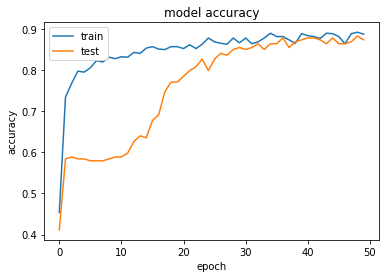

In [66]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('acc.png')
plt.show()

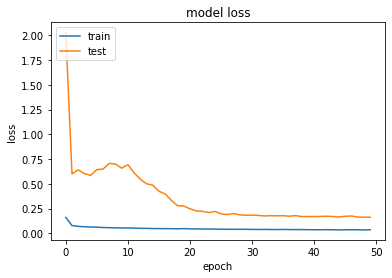

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
model = ResNet18(5)
model.build(input_shape = (None, 152, 270, 3))
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer = sgd,loss=tf.keras.losses.KLDivergence(), metrics=['accuracy',tf.keras.metrics.AUC()])
model.load_weights('final_augment_10.ckpt')

loss,acc,auc = model.evaluate(X_test,  y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
136/136 - 86s - loss: 0.0571 - accuracy: 0.9314 - auc_1: 0.9133 - 86s/epoch - 630ms/step
Restored model, accuracy: 93.14%


In [28]:
proba = model.predict(X_test)

136/136 [==============================] - 97s 709ms/step


In [42]:
from sklearn.metrics import mean_absolute_error
mape = mean_absolute_error(y_test, proba)
print(mape)

0.032745603


In [59]:
kelp = []
algae1 = []
algae2 =[]
rock = []
unknown = []
avrg = []
for i, j in zip(proba, y_test):
    k_mae = np.round(abs(i[0]-j[0]), 3)
    a1_mae = np.round(abs(i[1]-j[1]), 3)
    a2_mae = np.round(abs(i[2]-j[2]), 3)
    r_mae = np.round(abs(i[3]-j[3]), 3)
    u_mae = np.round(abs(i[4]-j[4]), 3)
    avg = (k_mae + a1_mae + a2_mae + r_mae + u_mae)/5

    kelp.append(k_mae)
    algae1.append(a1_mae)
    algae2.append(a2_mae)
    rock.append(r_mae)
    unknown.append(u_mae)
    avrg.append(avg)

In [60]:
k = sum(kelp)/len(kelp)
a1 = sum(algae1)/len(algae1)
a2 = sum(algae2)/len(algae2)
r = sum(rock)/len(rock)
u = sum(unknown)/len(unknown)
print(k, a1, a2, r, u)

0.056933718348673695 0.061122401971095745 0.03153441116072917 0.0060166282369325036 0.00809745964638278


In [63]:
fig = make_subplots(rows=3, cols=2, subplot_titles=['Kelp Error', 'Algae1 Error', 'Algae2 Error', 'Rock Error', 'Unknown Error'])

fig.add_trace(go.Histogram(x=kelp, name='Kelp'), row=1, col=1)
fig.add_trace(go.Histogram(x=algae1, name='Algae1'), row=1, col=2)
fig.add_trace(go.Histogram(x=algae2, name='Algae2'), row=2, col=1)
fig.add_trace(go.Histogram(x=rock, name='Rock'), row=2, col=2)
fig.add_trace(go.Histogram(x=unknown, name='Unknown'), row=3, col=1)

fig.update_layout(title_text="Absolute Error", height=1000)
go.Figure.write_html(fig,"error.html")
fig.show()

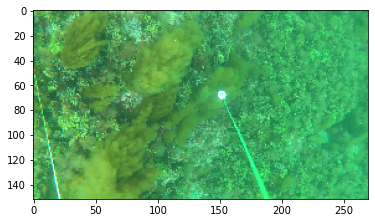

In [29]:
imgtest = image.load_img('../EasternShoreIslandsKelpSurvey2018/BirdI/6m_KA/BirdI6K_011.jpg', target_size=(152, 270, 3))
imgtest_ = image.img_to_array(imgtest)
imgtest_ = imgtest_/255
plt.imshow(imgtest_)

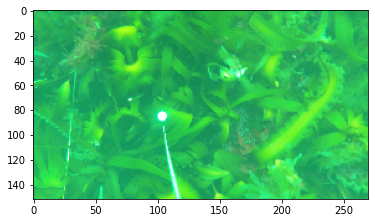

In [30]:
imgtest1 = image.load_img('../EasternShoreIslandsKelpSurvey2018/CampI/9m_AB/CampI9A_060.jpg', target_size=(152, 270, 3))
imgtest1_ = image.img_to_array(imgtest1)
imgtest1_ = imgtest1_/255
plt.imshow(imgtest1_)

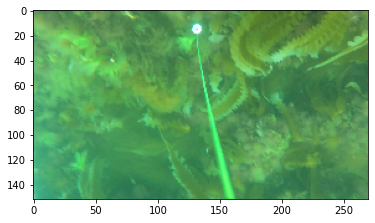

In [31]:
imgtest2 = image.load_img('../EasternShoreIslandsKelpSurvey2018/TheMoll/6m_AB/TheMoll6A_022.jpg', target_size=(152, 270, 3))
imgtest2_ = image.img_to_array(imgtest2)
imgtest2_ = imgtest2_/255
plt.imshow(imgtest2_)

In [35]:
classes = np.array(['Kelp', 'Algae1', 'Algae2', 'Rock', 'Unknown'])
proba = model.predict(imgtest_.reshape(1, 152, 270, 3))
# pred = proba.round()
# print(pred)
top_3 = np.argsort(proba[0])[:-6:-1]
for i in range(5):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
# plt.imshow(imgtest2)

1/1 [==============================] - 0s 109ms/step
Algae1 (0.92)
Kelp (0.0523)
Algae2 (0.0232)
Rock (0.00213)
Unknown (0.00206)
